# Showcasing the Impact of PCA in the Famous Cancer Dataset if Cancer is Malignant or Benin. 
# It will give the better or same accuracy with reduced features. If the features have multicollinearity we will implement PCA
# We will implement SVM and PCA.

In [97]:
import pandas as pd
import numpy as np

In [98]:
df_C = pd.read_csv('data.csv')

# Dropping the Unnamed Column in the dataset

In [100]:
df_C = df_C.iloc[:,:-1]

In [101]:
df_C['diagnosis'] = df_C['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [102]:
df_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-

In [103]:
df_C.describe().transpose()

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
diagnosis                569.0  3.725835e-01  4.839180e-01     0.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
diagnosis                     0.000000       0.000000  1.000000e+00   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.3

In [104]:
df_C.groupby('diagnosis').count()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                              
0          357          357           357             357        357   
1          212          212           212             212        212   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
0                      357               357             357   
1                      212               212             212   

           concave points_mean  symmetry_mean           ...             \
diagnosis                                               ...              
0                          357            357           ...              
1                          212            212           ...              

           radius_worst  texture_worst  perimeter_worst  area_worst  \
diagnosis                                                             
0                   357            357              357         357   
1                   212            212              212         212   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
0                       357                357              357   
1                       212                212              212   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
0                           357             357                      357  
1                           212             212                      212  

[2 rows x 31 columns]

In [105]:
X = df_C.drop(columns=['id','diagnosis'], axis=1)
y = df_C['diagnosis']

# Before moving to implement algo , let us do some analysis through Pair Plot

In [106]:
import seaborn as sns

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


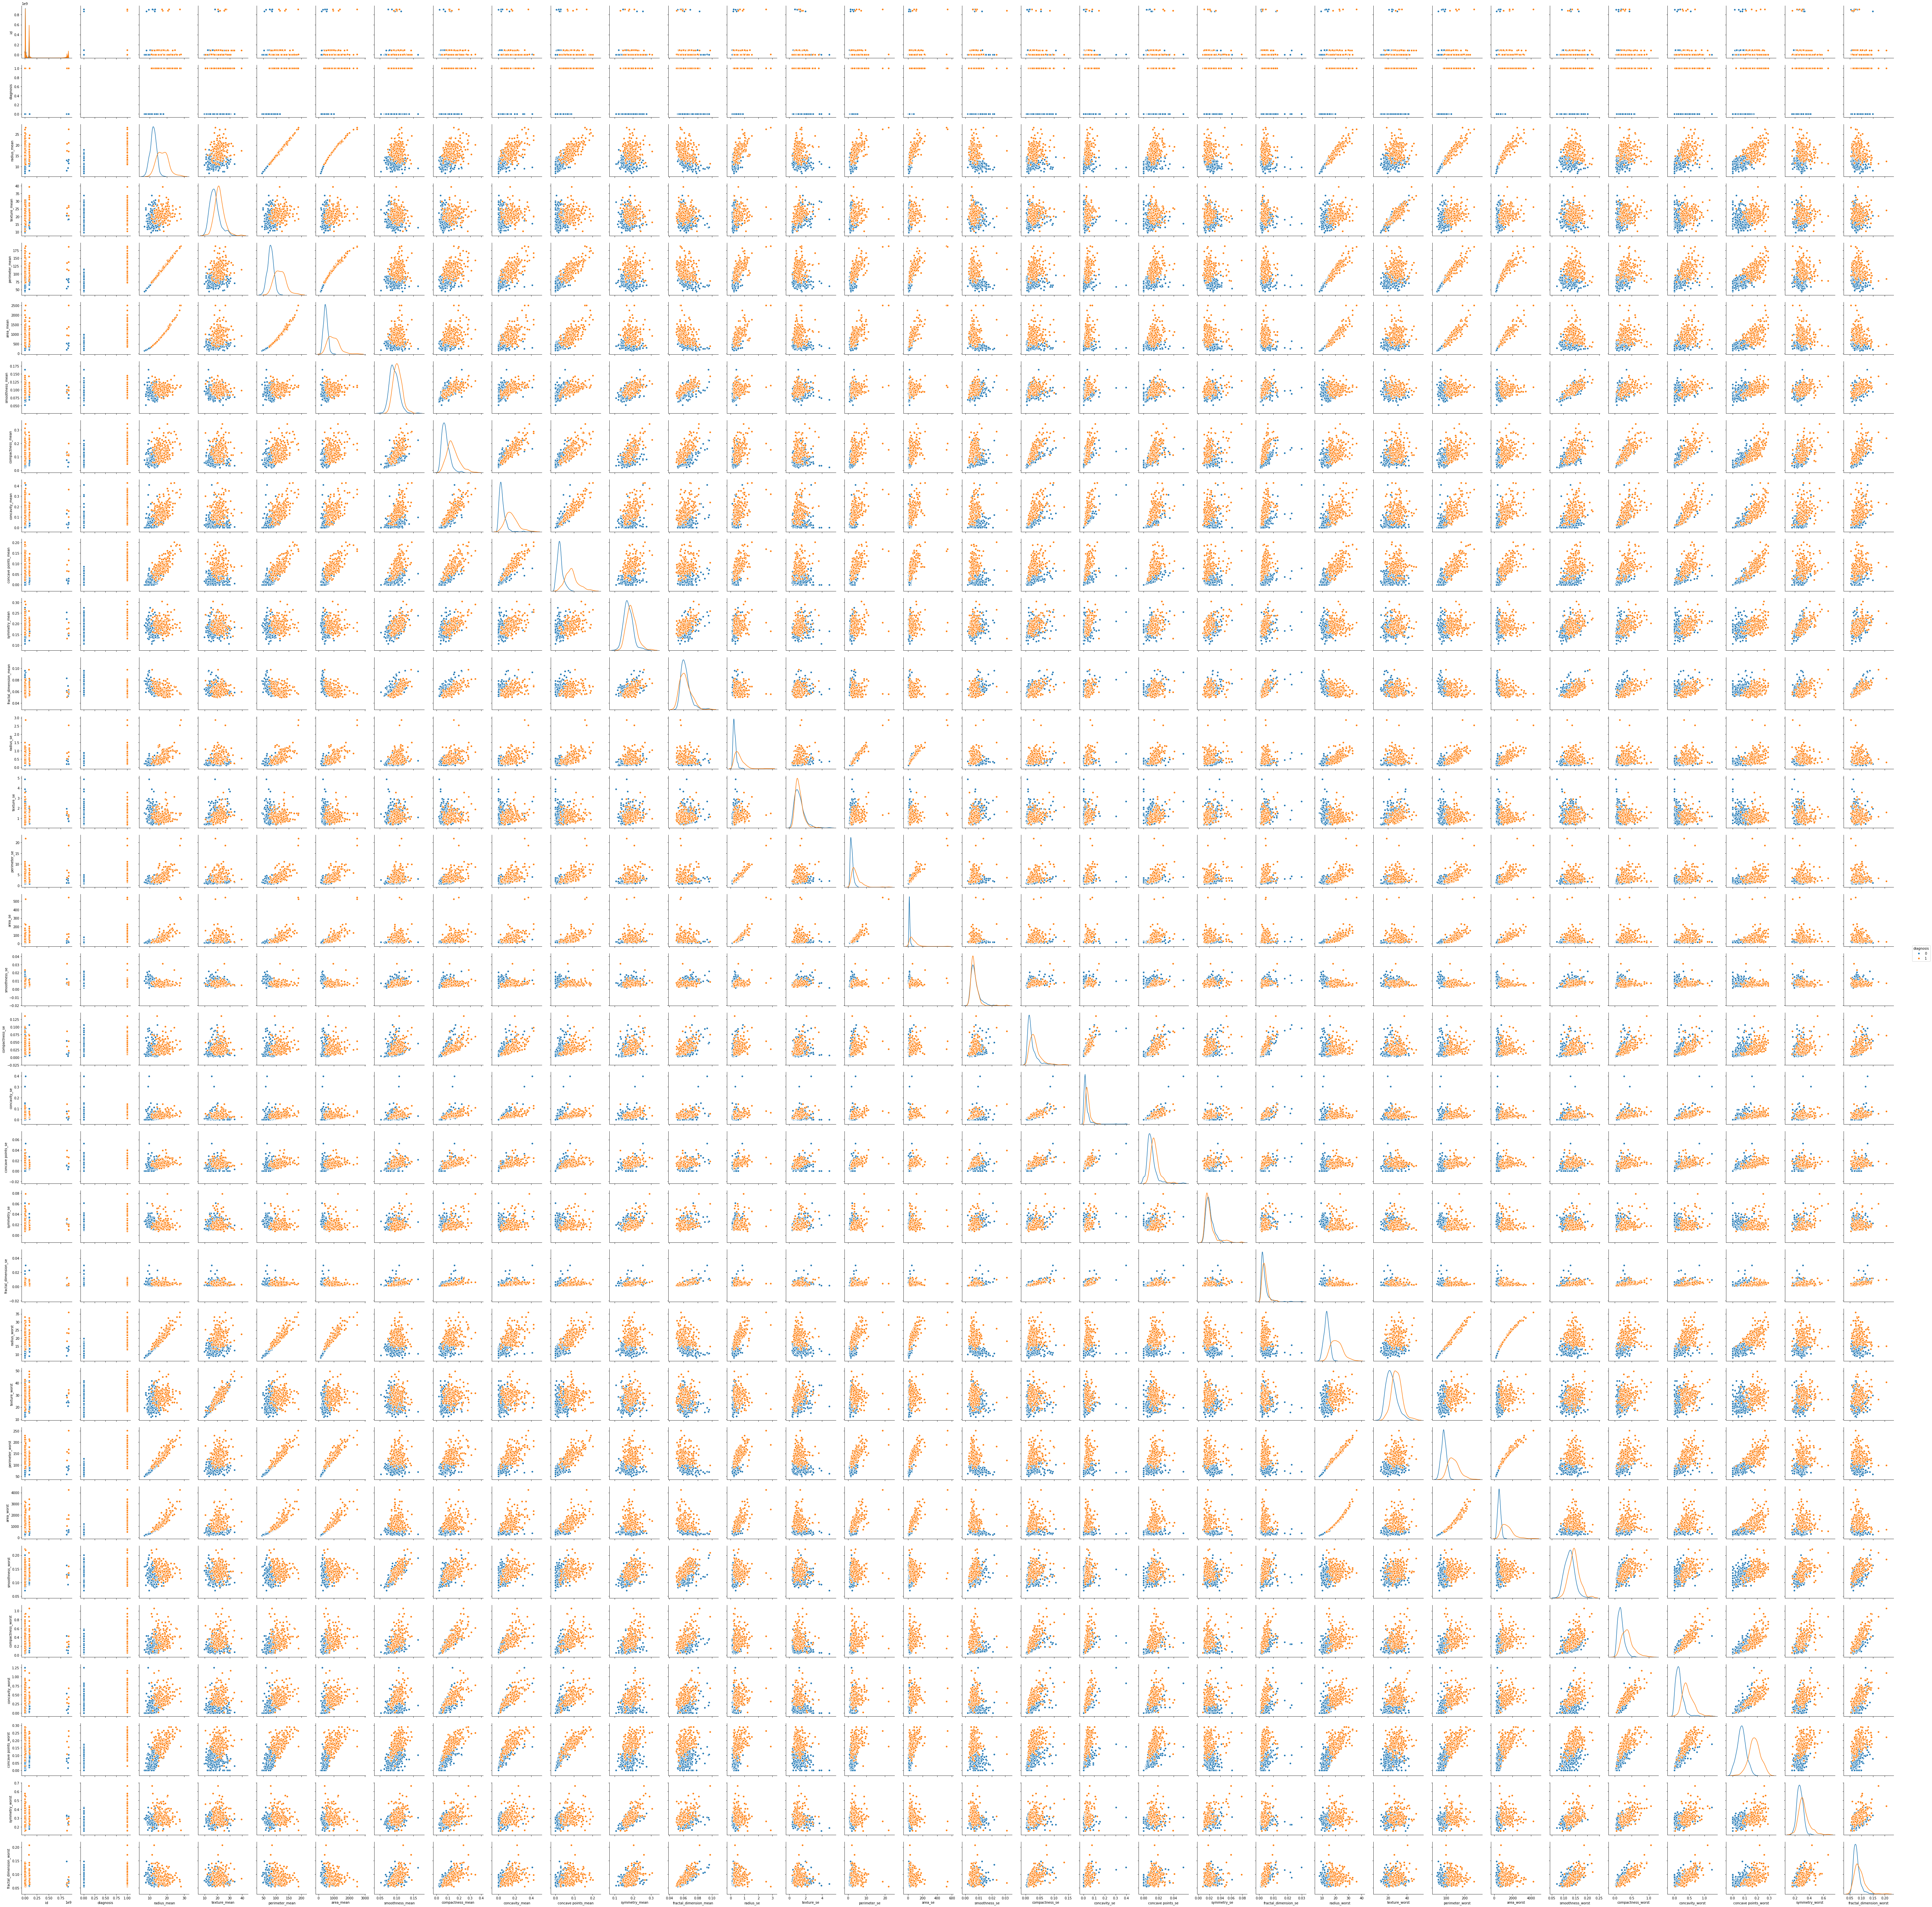

In [55]:
sns.pairplot(df_C,diag_kind= 'kde', hue = 'diagnosis')

# Some of the attributes can be seen as perfectly overlapping in the diagnols which means they are mirror image of each other and cannot be distinguished from each other.

# Converting into Z scor or standard scalare for indepedent variables.

In [110]:
from scipy.stats import zscore

In [111]:
X_zscore= X.apply(zscore)

In [155]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#  Reusable Functions for Prediction

In [362]:
def SVM_CM(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.3, random_state = 1234)
    clf = SVC(kernel='linear',C=0.5)
    clf.fit(X_train, y_train)
    pred_test=clf.predict(X_test)
    matrix=confusion_matrix(y_test, pred_test)
    report = classification_report(y_test,pred_test)
    accuracy = clf.score(X_test,y_test)
    return report, accuracy


In [363]:
# print SVM_CM(X,y)
report, accuracy = SVM_CM(X,y)
print report
print accuracy


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       105
           1       1.00      0.86      0.93        66

   micro avg       0.95      0.95      0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

0.9473684210526315


In [364]:
from sklearn.decomposition import PCA

In [366]:
pca = PCA()
pca.fit(X_zscore)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [367]:
print(pca.components_)
print(pca.explained_variance_)

[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.75339469e-01]
 [-8.5

In [275]:
%matplotlib inline
import matplotlib.pyplot as plt

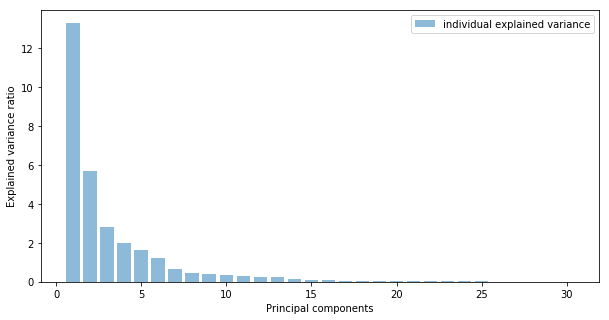

In [277]:

plt.figure(figsize=(10 , 5))
plt.bar(range(1,31), pca.explained_variance_, alpha=0.5, align='center', label='individual explained variance')
# plt.step(range(1,10),pca.components_, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [279]:
df_PCA = pca.explained_variance_[0:10]

In [280]:
df_PCA

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

In [281]:
# P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 7 dimension space

# X_std_2D = np.dot(X_corr_z,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(df_PCA)

In [356]:
pca = PCA(n_components=9)
pca.fit(X_zscore)
X_Pca = pca.transform(X_zscore)

In [357]:
X_Pca.shape

(569L, 9L)

In [360]:
def SVM_CM(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X_Pca, y, test_size=0.3, random_state = 1234)
    clf = SVC(kernel='linear',C=0.5)
    clf.fit(X_train, y_train)
    pred_test=clf.predict(X_test)
    matrix=confusion_matrix(y_test, pred_test)
    report = classification_report(y_test,pred_test)
    accuracy = clf.score(X_test,y_test)
    return report, accuracy


In [361]:
report, accuracy = SVM_CM(X,y)
print report
print accuracy


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       105
           1       1.00      0.86      0.93        66

   micro avg       0.95      0.95      0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

0.9473684210526315


#  We are recieveing the same accuracy with the 9 components as well hence that will help in optimizing the performance.